# Investor Owned Utilities Data
In this Ipython notebook, I will use beautifulsoup to scrape a table of Investor Owned Utilities from Wikipedia. It gets a bit tricky because some rows have a pesky problem with rowspan.

In [1]:
import pandas as pd
import urllib2
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)



//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
IOU='https://en.wikipedia.org/wiki/Investor-owned_utility' #the wikipedia link

In [3]:
page=urllib2.urlopen(IOU)

In [4]:
page.geturl() # make sure no redirect

'https://en.wikipedia.org/wiki/Investor-owned_utility'

In [5]:
soup=BeautifulSoup(page,'lxml')

In [6]:
print soup.prettify()

In [7]:
soup.title.string

u'Investor-owned utility - Wikipedia'

In [8]:
right_table=soup.find('table', {'class':'wikitable sortable'}) # The class of the table is wikitable sortable
#print right_table

We can see the problem with rowspan. Some rows of the first column have a rowspan number. For instance if there's a rowspan of 2, that value spans over 2 rows. However, without taking proper care to adjust for this, we would lose the data for the second row. The problem obviously gets worse the larger the rowspan number is

In [9]:
#change rowsleft into something else
rowspans = [] #use this to save data on rows with a rowspan variable
dd=[]
for row in right_table.findAll("tr"): #find all the rows in the table
    cells = row.findAll(["th", "td"]) #Headers and columns
    if len(rowspans) == 0:
        rowspans = [None for row in cells] #define rowspans by the number of columns
    for i, cell in enumerate(cells):
        if cell.has_attr("rowspan"):
            rowspan_data = {'rows_left': int(cell["rowspan"]),'value': cell,}
            rowspans[i] = rowspan_data
        elif len(cells) != len(rowspans):
            for index, rowspan_data in enumerate(rowspans):
                if rowspan_data is not None:# Insert the data from previous row; decrement rows left
                    cells.insert(index, rowspan_data['value'])
                    if rowspans[index]['rows_left'] == 1:
                        rowspans[index] = None     
                    else:
                        rowspans[index]['rows_left'] -= 1
                        
    dd.append(cells)


In [10]:
PC=[]
OC=[]
OS=[]
for row in dd:
    PC.append(row[0].find(text=True))
    OC.append(row[1].find(text=True))
    OS.append(row[2].find(text=True))

In [11]:
df=pd.DataFrame(PC) #create a dataframe 
df['Operating Company']=OC
df['State']=OS
df.columns=df.iloc[0] #set the first row as the header

In [12]:
df=df.ix[1:,] 

In [13]:
df=df.reset_index()
del df['index']

In [14]:
df.head()

,Parent Company,Operating Company,Operating States
0,AES Corporation,Indianapolis Power & Light,IN
1,AES Corporation,Dayton Power and Light,OH
2,Allete,Minnesota Power,MN
3,Allete,"Superior Water, Light and Power",WI
4,Alliant Energy,Interstate Power and Light,"IA, MN"


Create tickers for publicly traded companies

In [15]:
ticker=[]
for i in range(len(df)):
    if df['Parent Company'].str.contains('AES')[i]==True:
        ticker.append('AES')
    elif df['Parent Company'].str.contains('FirstEnergy')[i]==True:
        ticker.append('FE')
    elif df['Parent Company'].str.contains('American Elect')[i]==True:
        ticker.append('AEP')
    elif df['Parent Company'].str.contains('Dominion')[i]==True:
        ticker.append('D')
    elif df['Parent Company'].str.contains('Allete')[i]==True:
        ticker.append('ALE')
    elif df['Parent Company'].str.contains('PPL')[i]==True:
        ticker.append('PPL')
    elif df['Parent Company'].str.contains('Duke')[i]==True:
        ticker.append('DUK')
    elif df['Parent Company'].str.contains('Xcel')[i]==True:
        ticker.append('XEL')
    elif df['Parent Company'].str.contains('Alliant')[i]==True:
        ticker.append('LNT')
    elif df['Parent Company'].str.contains('Exelon')[i]==True:
        ticker.append('EXC')
    elif df['Parent Company'].str.contains('Entergy')[i]==True:
        ticker.append('ETR')
    elif df['Parent Company'].str.contains('Hawaii')[i]==True:
        ticker.append('HE')
    elif df['Parent Company'].str.contains('Consolidated Edison')[i]==True:
        ticker.append('ED')
    elif df['Parent Company'].str.contains('Southern Company')[i]==True:
        ticker.append('SO')
    elif df['Parent Company'].str.contains('Ameren')[i]==True:
        ticker.append('AEE')
    elif df['Parent Company'].str.contains('Unitil')[i]==True:
        ticker.append('UTL')
    elif df['Parent Company'].str.contains('Pepco')[i]==True:
        ticker.append('POM')
    elif df['Parent Company'].str.contains('Black Hills')[i]==True:
        ticker.append('BKH')
    elif df['Parent Company'].str.contains('Avista')[i]==True:
        ticker.append('AVA')
    elif df['Parent Company'].str.contains('ITC Holdings')[i]==True:
        ticker.append('ITC')
    elif df['Parent Company'].str.contains('National Grid')[i]==True:
        ticker.append('NGG')
    elif df['Parent Company'].str.contains('CenterPoint')[i]==True:
        ticker.append('CNP')
    elif df['Parent Company'].str.contains('UniSource')[i]==True:
        ticker.append('UNS')
    elif df['Parent Company'].str.contains('CLECO')[i]==True:
        ticker.append('CNL')
    elif df['Parent Company'].str.contains('PNM')[i]==True:
        ticker.append('PNM')
    elif df['Parent Company'].str.contains('Westar')[i]==True:
        ticker.append('WR')
    elif df['Parent Company'].str.contains('El Paso')[i]==True:
        ticker.append('EE')
    elif df['Parent Company'].str.contains('CMS Energy')[i]==True:
        ticker.append('CMS')
    elif df['Parent Company'].str.contains('Wisconsin Energy')[i]==True:
        ticker.append('WEC')
    elif df['Parent Company'].str.contains('Great Plains')[i]==True:
        ticker.append('GXP')
    elif df['Parent Company'].str.contains('MDU')[i]==True:
        ticker.append('MDU')
    elif df['Parent Company'].str.contains('DTE')[i]==True:
        ticker.append('DTE')
    elif df['Parent Company'].str.contains('Edison International')[i]==True:
        ticker.append('EIX')
    elif df['Parent Company'].str.contains('Vectren')[i]==True:
        ticker.append('VVC')
    elif df['Parent Company'].str.contains('UIL Holdings')[i]==True:
        ticker.append('UIL')
    elif df['Parent Company'].str.contains('Sempra')[i]==True:
        ticker.append('SRE')
    elif df['Parent Company'].str.contains('Integrys')[i]==True:
        ticker.append('TEG')
    elif df['Parent Company'].str.contains('NextEra')[i]==True:
        ticker.append('NEE')
    elif df['Parent Company'].str.contains('MGE')[i]==True:
        ticker.append('MGE')
    elif df['Parent Company'].str.contains('OGE')[i]==True:
        ticker.append('OGE')
    elif df['Parent Company'].str.contains('NiSource')[i]==True:
        ticker.append('NI')
    elif df['Parent Company'].str.contains('NSTAR')[i]==True:
        ticker.append('NST')
    elif df['Parent Company'].str.contains('TECO')[i]==True:
        ticker.append('TE')
    elif df['Parent Company'].str.contains('PG&E')[i]==True:
        ticker.append('PCG')
    elif df['Parent Company'].str.contains('NorthWestern Corp')[i]==True:
        ticker.append('NWE')
    elif df['Parent Company'].str.contains('NRG')[i]==True:
        ticker.append('NRG')
    elif df['Parent Company'].str.contains('Otter Tail')[i]==True:
        ticker.append('OTTR')
    elif df['Parent Company'].str.contains('Public Service Enterprise')[i]==True:
        ticker.append('PEG')
    elif df['Parent Company'].str.contains('Puget')[i]==True:
        ticker.append('PSD')
    elif df['Parent Company'].str.contains('SCANA')[i]==True:
        ticker.append('SCG')
    elif df['Parent Company'].str.contains('UGI Corp')[i]==True:
        ticker.append('UGI')
    elif df['Parent Company'].str.contains('Portland Gen')[i]==True:
        ticker.append('POR')
    elif df['Parent Company'].str.contains('Pinnacle West')[i]==True:
        ticker.append('PNW')
    elif df['Parent Company'].str.contains('Northeast Utilities')[i]==True:
        ticker.append('NU')
    elif df['Parent Company'].str.contains('DQE')[i]==True:
        ticker.append('DQE')
    else:
        ticker.append('')
df['ticker']=ticker

### What parent companies have the most utilities?

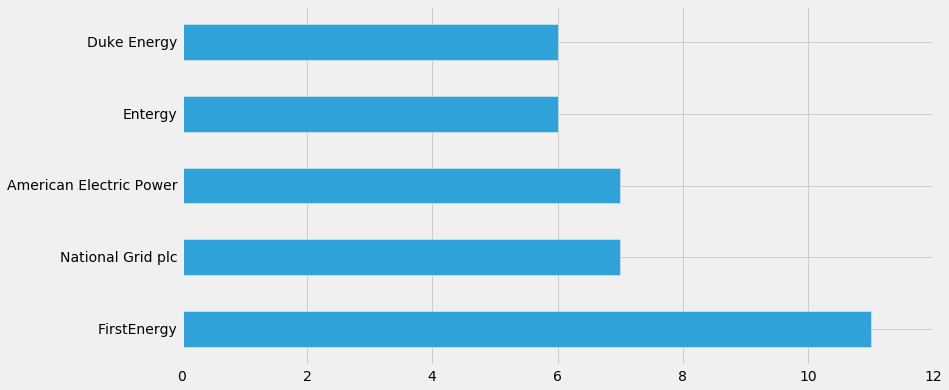

In [16]:
df['Parent Company'].value_counts().head().plot(kind='barh')

### What parent companies have the least number of utilities?

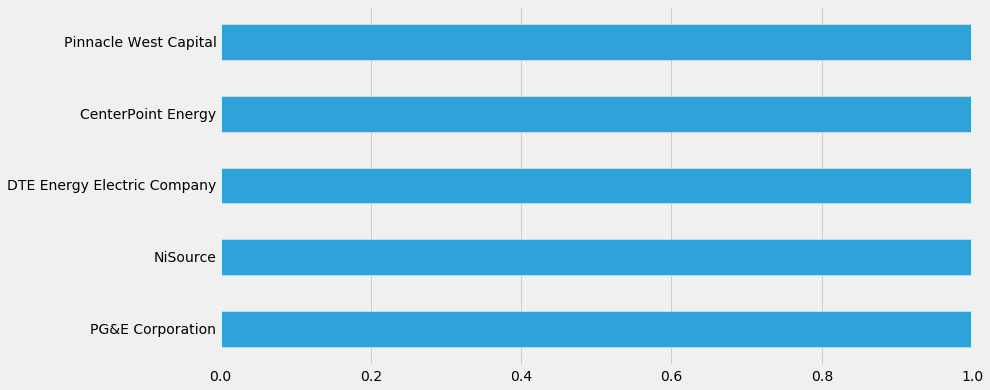

In [17]:
df['Parent Company'].value_counts().tail().plot(kind='barh')